# Objectives
The first objective is to predict 3 months of sales for 50 different items at 10 different stores.

The second objective is to answer each of the following questions:
- What's the best way to deal with seasonality? 
- Should stores be modeled separately, or can you pool them together? 
- Does deep learning work better than ARIMA? 
- Can either beat xgboost?

Technically, the objective is to predict the sales from 2018-01-01 to 2018-03-31 for stores 1 to 10 and items 1 to 50 in the test set where the train set is given.

# Data Acquisition

The objective is to get the train and test data sets and extract basic information before starting the data exploratory phase.

## Data Source

The data come from Kaggle and are downloaded here.

## Dataset Basic Information

We need to know how much data do we have in our data sets to help us determining a list of algorithms that will suit better to achieve the objectives.

- Number of rows
- Number of columns
- Percentage: number of rows of a data set / total number of rows of test + train sets * 100


In [6]:
import pandas
import numpy as np
import matplotlib.pyplot as plt


train = pandas.read_csv("Dataset/train.csv")
train_number_of_rows = len(train.index)
train_number_of_cols = len(train.columns)
print("Train set - Number of rows:", train_number_of_rows)
print("Train set - Number of columns:", train_number_of_cols)

test = pandas.read_csv("Dataset/test.csv")
test_number_of_rows = len(test.index)
test_number_of_cols = len(test.columns)
print("\nTest set - Number of rows:", test_number_of_rows)
print("Test set - Number of columns:", test_number_of_cols)

percentage_test = round(test_number_of_rows / (test_number_of_rows + train_number_of_rows) * 100, 2)
print("The test set contains", percentage_test, "% of the overall datasets.\n")

print (train.head())

Train set - Number of rows: 913000
Train set - Number of columns: 4

Test set - Number of rows: 45000
Test set - Number of columns: 4
The test set contains 4.7 % of the overall datasets.

         date  store  item  sales
0  2013-01-01      1     1     13
1  2013-01-02      1     1     11
2  2013-01-03      1     1     14
3  2013-01-04      1     1     13
4  2013-01-05      1     1     10


# Applicable Algorithms

The objective is to find a list of algorithms that can be applied to our problem.

We know that we have the sales for the 5 past years (2013-01-01 to 2017-12-31) from which we have to forecast the sales for the next 3 months (2018-01-01 to 2018-03-31). 

The time series is the mathematical tools to use in this context.

# Data Exploration

The objective is to explore the training and test sets in order to understand and visualize how the sales varies in function of the time for each store and item.

We have to check:
- Seasonality
- Days of the week
- Holidays
- Stationarity



Text(0.5,1,'Sales in function of the time for store 2 and item 2')

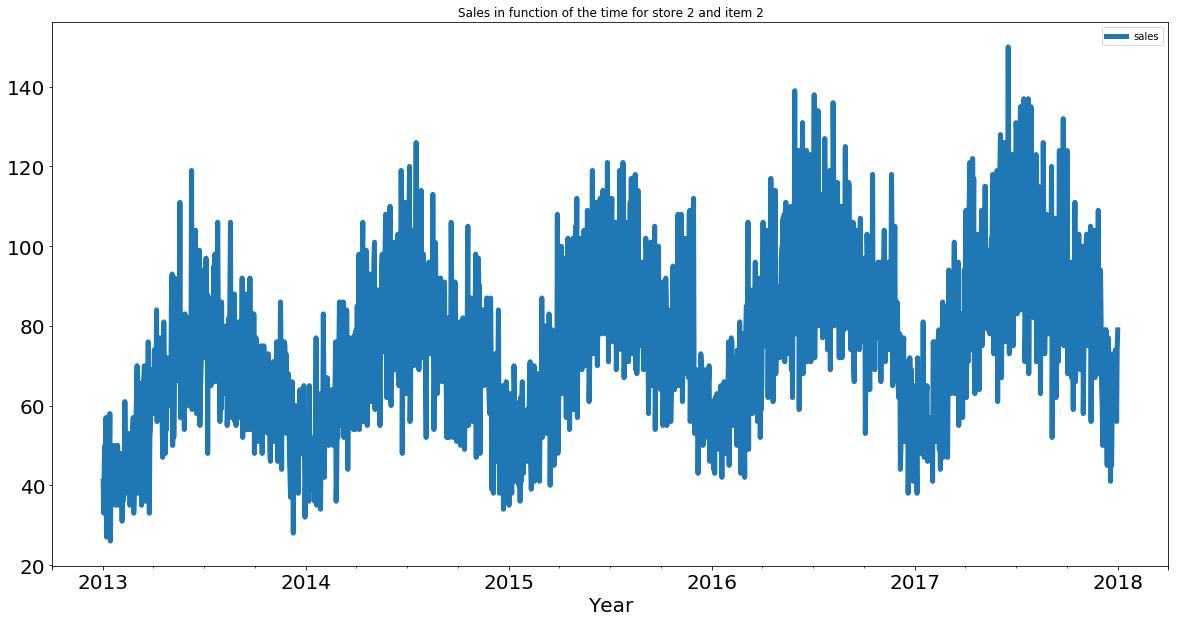

In [22]:
store = train.loc[(train.store == 2) & (train.item == 2), ['date', 'sales']]
store.date = pandas.to_datetime(store.date)
store.set_index('date', inplace=True)
store.head()

store.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.title("Sales in function of the time for store 2 and item 2")